In [1]:
import requests

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.dpi']= 300
mpl.rcParams['pdf.fonttype'] = 42 # for Illustrator text compatibility
mpl.rcParams['ps.fonttype'] = 42 # for Illustrator text compatibility

In [3]:
COLOUR_BACKGROUND = '#f7f3ed'
COLOUR_ALMOST_BLACK = '#323232'
COLOUR_BLUE = '#1c7ed6'
COLOUR_YELLOW = '#f59f00'
COLOUR_RED = '#f03e3e'

In [4]:
url_base = 'https://www.fotmob.com/api/'
url_match_details = 'matchDetails?matchId='

In [5]:
match_id = 3978742

In [6]:
url_complete = url_base + url_match_details + str(match_id)

In [7]:
match_summary = requests.get(url_complete).json()
shot_summary = match_summary['content']['shotmap']['shots']

In [8]:
home_team = match_summary['general']['homeTeam']['name']
home_team_id = match_summary['general']['homeTeam']['id']
away_team = match_summary['general']['awayTeam']['name']
away_team_id = match_summary['general']['awayTeam']['id']
round_name = match_summary['general']['leagueRoundName']
match_result = match_summary['header']['status']['scoreStr']

In [9]:
top_stats = [stat for stat in match_summary['content']['stats']['stats'] if stat['title'] == 'TOP STATS'][0]['stats']
xg_score = [stat for stat in top_stats if stat['title'] == 'Expected goals (xG)'][0]['stats']

In [10]:
xg_scoreline = xg_score[0] + ' xG - ' + xg_score[1] + ' xG'
xg_scoreline

'4.44 xG - 0.59 xG'

In [11]:
all_cards = [event for event in match_summary['content']['matchFacts']['events']['events'] if event['type'] == 'Card']
red_cards = [card for card in all_cards if card['card'] == 'Red']
red_cards

[{'reactKey': '48Card69297undefinedfalse',
  'timeStr': 48,
  'type': 'Card',
  'time': 48,
  'overloadTime': None,
  'eventId': 9525968,
  'player': {'id': 69297,
   'name': 'Nikolai Topor-Stanley',
   'profileUrl': '/players/69297/nikolai-topor-stanley'},
  'profileUrl': '/players/69297/nikolai-topor-stanley',
  'overloadTimeStr': False,
  'isHome': False,
  'nameStr': 'Nikolai Topor-Stanley',
  'card': 'Red'}]

In [12]:
red_cards_to_plot = [[red_card['time'], red_card['player']['name'], home_team_id if red_card['isHome'] else away_team_id] for red_card in red_cards]
red_cards_to_plot

[[48, 'Nikolai Topor-Stanley', 1079464]]

In [13]:
shot_key_details = [(shot_summary['min'], shot_summary['expectedGoals'], shot_summary['eventType'], shot_summary['playerName'], shot_summary['teamId']) for shot_summary in shot_summary]

In [14]:
team_colours = {}
team_colours[home_team_id] = COLOUR_BLUE
team_colours[away_team_id] = COLOUR_YELLOW

In [15]:
# insert zero to start
for team_id in [home_team_id, away_team_id]:
    shot_key_details.insert(0, (0, 0, 'Kick off', np.nan, team_id))
    shot_key_details.insert(0, (0, 0, 'Kick off', np.nan, team_id))

In [16]:
df_shots = pd.DataFrame(shot_key_details, columns=['minute', 'xG', 'event', 'player', 'team'])

In [17]:
df_shots['goal'] = np.where(df_shots['event']=='Goal', 1, 0)
df_shots['team_cumulative_xg'] = df_shots[['team', 'xG']].groupby('team').cumsum()
df_shots['team_cumulative_goal'] = df_shots[['team', 'goal']].groupby('team').cumsum()

In [18]:
df_shots

,minute,xG,event,player,team,goal,team_cumulative_xg,team_cumulative_goal
0,0,0.000000,Kick off,NaN,1079464,0,0.000000,0
1,0,0.000000,Kick off,NaN,1079464,0,0.000000,0
2,0,0.000000,Kick off,NaN,8164,0,0.000000,0
3,0,0.000000,Kick off,NaN,8164,0,0.000000,0
4,3,0.081437,Miss,Maximilien Balard,8164,0,0.081437,0
5,6,0.088022,Miss,Nectarios Triantis,8164,0,0.169459,0
6,6,0.059210,Miss,Maximilien Balard,8164,0,0.228669,0
7,6,0.025100,AttemptSaved,Thomas Aquilina,8164,0,0.253770,0
8,6,0.144657,AttemptSaved,Brian Kaltak,8164,0,0.398426,0
9,11,0.048227,AttemptSaved,Jason Cummings,8164,0,0.446654,0


In [19]:
for red_card in red_cards_to_plot:
    team = red_card[2]
    minute = red_card[0]
    df_shots_team_before_card = df_shots[(df_shots['team']==team) & (df_shots['minute']<=minute)]
    team_xg_at_time_of_card = df_shots_team_before_card['team_cumulative_xg'].max()
    red_card.append(team_xg_at_time_of_card)
    

In [20]:
red_cards_to_plot

[[48, 'Nikolai Topor-Stanley', 1079464, 0.5406124591827393]]

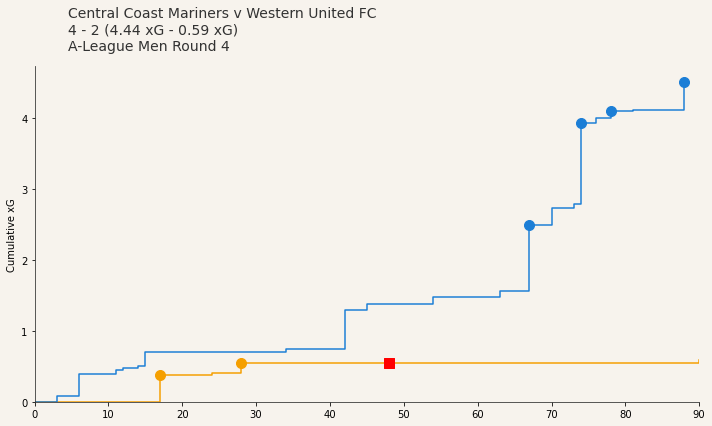

In [21]:
fig, ax = plt.subplots(figsize=(10,6))

for team in set(df_shots['team']):
    colour = team_colours[team]
    df_team_shots = df_shots[df_shots['team']==team]
    df_team_goals = df_team_shots[df_team_shots['goal']==1]
    red_cards_for_team = [red_card for red_card in red_cards_to_plot if red_card[2] == team]
    ax.step(df_team_shots['minute'], df_team_shots['team_cumulative_xg'], where='post', color=colour, zorder=1)
    ax.scatter(df_team_goals['minute'], df_team_goals['team_cumulative_xg'], s=100, color=colour, zorder=2)
    for red_card in red_cards_for_team:
        ax.scatter(red_card[0], red_card[3], s=100, color='red', marker='s', zorder=3)

ax.set_xlim(xmin=0, xmax=90)
ax.set_ylim(ymin=0)
ax.set_ylabel('Cumulative xG')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color(COLOUR_ALMOST_BLACK)
ax.spines['bottom'].set_color(COLOUR_ALMOST_BLACK)

fig.patch.set_color(COLOUR_BACKGROUND)
ax.patch.set_color(COLOUR_BACKGROUND)

plot_title = home_team + ' v ' + away_team + '\n' + match_result + ' (' + xg_scoreline + ')' + '\n' + round_name 

fig.suptitle(plot_title, ha='left', x=0.10, size=14, color=COLOUR_ALMOST_BLACK)

fig.tight_layout()

fig.savefig('img/temp.pdf', bbox_inches='tight')